# Ejercicio 2

Este ejercicio pretende poner en práctica la habilidad de limpiar datos y visualizar plots para crear finalmente modelos en __sklearn__.

El estudiante tendrá que repasar los comandos realizados en clase y lidiar con posibles errores durante el desarrollo. 

Para facilitar y agilizar el desarrollo, el estudiante tendrá que rellenar los huecos marcados como __# codigo-alumno__. No obstante, si además el estudiante necesita ejecutar código adicional, siempre podrá utilizar cualquier celda intermedia. 

Las celdas con el título __""" No alterar """__, no deben ser modificadas por el estudiante. Sin embargo sí que se pueden ejecutar, pues representan controles intermedios para asegurar que no se cometen errores importantes que desvirtuen el desarrollo esperado del ejercicio.

Finalmente, la entrega será un fichero .ipynb cambiando nombre y apellido al fichero. No hace falta entregarlo en html/pdf ni comprimirlo.

# Fase inicial: Preparativos del ejercicio

Estableceremos una semilla que nos permita generar números aleatorios bajo control.

__Importante__: Todos los comandos (incluido algoritmos) generen números aleatorios deberás ser inicializados con esta semilla.

In [1]:
seed = 99

Además, cargaremos todos los comandos vistos en el curso. Si el estudiante considera utilizar alguna librería adicional, puede hacerlo en esta fase.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style('darkgrid')
np.set_printoptions(precision=3)
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

Trabajaremos con el dataframe de sklearn llamado _fetch_kddcup99_ y lo almacenacenaremos en una variable. Además, no trabajaremos con todas las variables, sino con las features seleccionadas en _key_colums_ y la variable a predecir _target_.

_Nota_: Si tuvieramos problemas en esta celda, lo más probable es que se deba a que tengamos una versión inferior a 0.24 de sklearn

In [3]:
from sklearn.datasets import fetch_kddcup99

data = fetch_kddcup99(as_frame=True)
df = data.frame

key_columns = ['duration', 'protocol_type', 'service', 'flag', 'logged_in', 'count', 'srv_count', 'serror_rate', 'dst_host_srv_count', 'dst_host_srv_serror_rate']
target = 'labels'

df = df[key_columns + [target]]
df.head()

,duration,protocol_type,service,flag,logged_in,count,srv_count,serror_rate,dst_host_srv_count,dst_host_srv_serror_rate,labels
0,0,b'tcp',b'http',b'SF',1,8,8,0.0,9,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',1,8,8,0.0,19,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',1,8,8,0.0,29,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',1,6,6,0.0,39,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',1,6,6,0.0,49,0.0,b'normal.'


# Fase exploración, limpieza y transformación

En la siguiente celda, comprobad que no haya nulos

In [4]:
# codigo-alumno
df.isnull().sum()

duration                    0
protocol_type               0
service                     0
flag                        0
logged_in                   0
count                       0
srv_count                   0
serror_rate                 0
dst_host_srv_count          0
dst_host_srv_serror_rate    0
labels                      0
dtype: int64

En la siguiente celda, eliminad los registros duplicados

In [5]:
# codigo-alumno
df = df.drop_duplicates()
df.duplicated().sum()

0

In [6]:
""" No alterar """

try:
    assert df.shape == (54165, 11)
except:
    print('Algo falla')

En la siguiente celda, mostrad un barplot para la variable objetivo (labels)

_Nota_: Un barplot para variables categóricas, no histograma

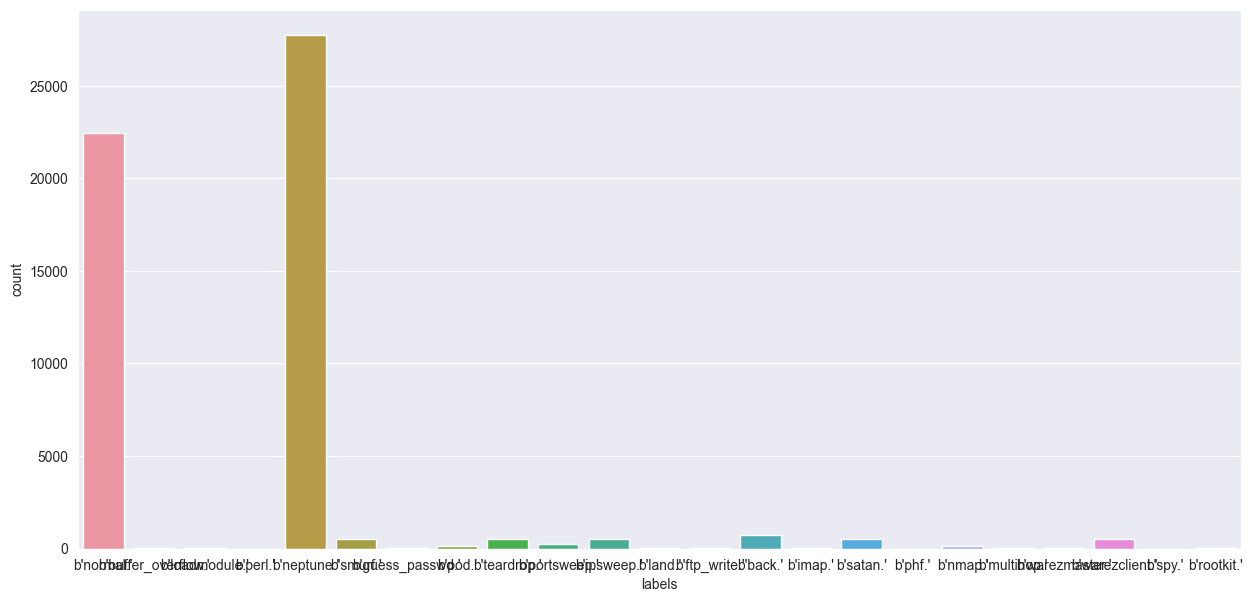

In [7]:
# codigo-alumno
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='labels')
plt.show()

A continuación, solo trabajaremos con las labels de mayor frecuencia. Por tanto, en la siguiente celda, filtrad el dataframe para quedarnos con las más frecuentes.

In [8]:
df.dtypes

duration                    object
protocol_type               object
service                     object
flag                        object
logged_in                   object
count                       object
srv_count                   object
serror_rate                 object
dst_host_srv_count          object
dst_host_srv_serror_rate    object
labels                      object
dtype: object

In [9]:
df = df.convert_dtypes() #ajustamos tipos ya que todos son object
df.dtypes

duration                      Int64
protocol_type                object
service                      object
flag                         object
logged_in                     Int64
count                         Int64
srv_count                     Int64
serror_rate                 Float64
dst_host_srv_count            Int64
dst_host_srv_serror_rate    Float64
labels                       object
dtype: object

In [10]:
# Decodificamos las que quedan tipo object con utf8
object_cols = ['protocol_type', 'service','flag', 'labels']
for col in object_cols:
    df[col] = df[col].str.decode('utf8')

In [11]:
df.head() # verificamos que los cambios se han ejecutado

,duration,protocol_type,service,flag,logged_in,count,srv_count,serror_rate,dst_host_srv_count,dst_host_srv_serror_rate,labels
0,0,tcp,http,SF,1,8,8,0.0,9,0.0,normal.
1,0,tcp,http,SF,1,8,8,0.0,19,0.0,normal.
2,0,tcp,http,SF,1,8,8,0.0,29,0.0,normal.
3,0,tcp,http,SF,1,6,6,0.0,39,0.0,normal.
4,0,tcp,http,SF,1,6,6,0.0,49,0.0,normal.


In [12]:
# codigo-alumno -  Filtrado
df['labels'] = df.labels.apply(lambda x: x if x in ['neptune.', 'normal.'] else None)
df = df[~(df.labels.isnull())]

In [13]:
""" No alterar """

try:
    assert df.shape == (50177, 11)
except:
    print('Algo falla')

En la siguiente celda, volved a mostra un barplot para la variable objetivo (labels) del dataframe ya filtrado

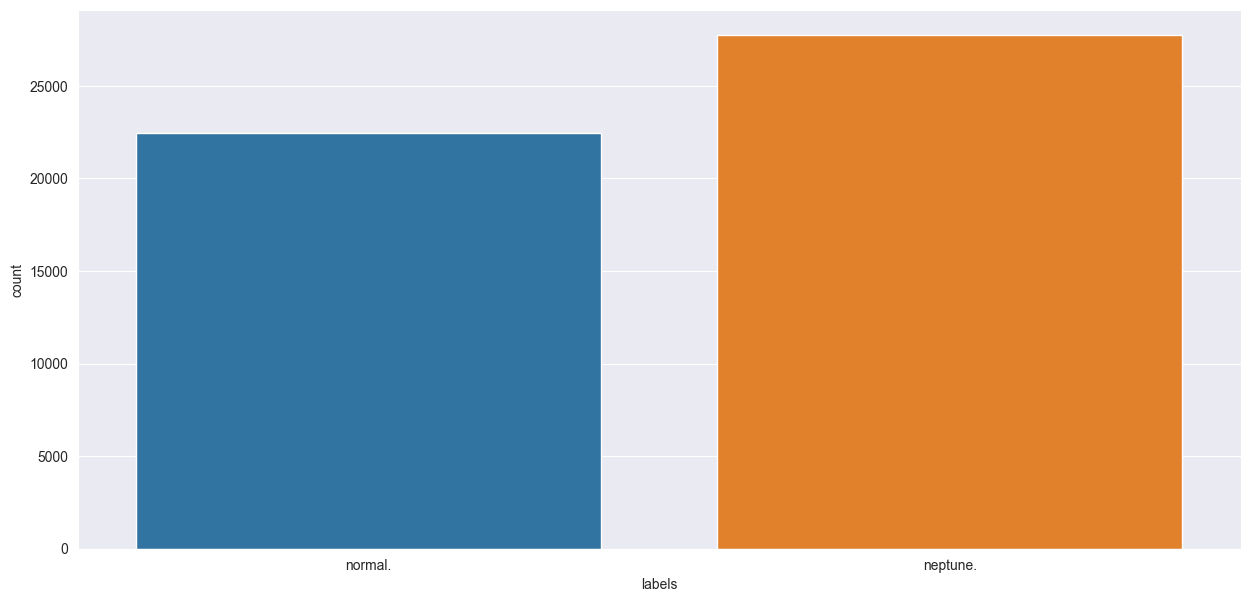

In [14]:
# codigo-alumno
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='labels')
plt.show()

En la siguiente celda, exploraremos transformaciones sobre las variables numéricas. Para ello, se pide mostrar 3 histogramas por cada feature numérica:
* Uno con el valor de la variable 
* Uno con el valor de la variable transformada por Box-Cox (si es viable)
* Uno con el valor de la variable transformada por Yeo-Johnson

In [15]:
# vemos las numericas
df.dtypes

duration                      Int64
protocol_type                object
service                      object
flag                         object
logged_in                     Int64
count                         Int64
srv_count                     Int64
serror_rate                 Float64
dst_host_srv_count            Int64
dst_host_srv_serror_rate    Float64
labels                       object
dtype: object

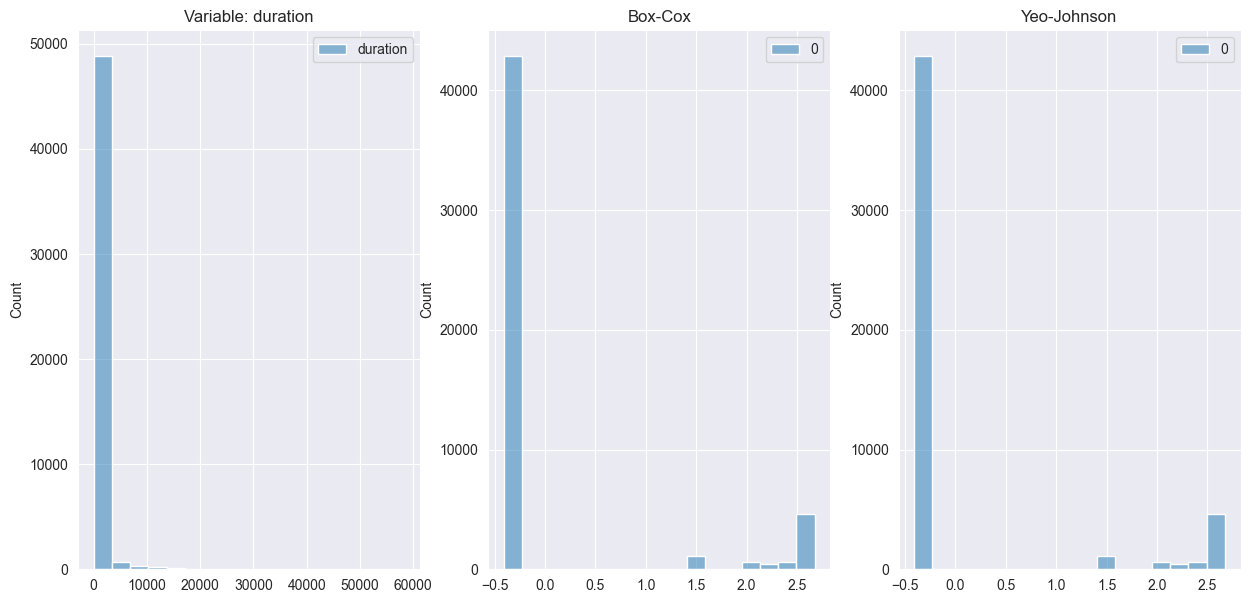

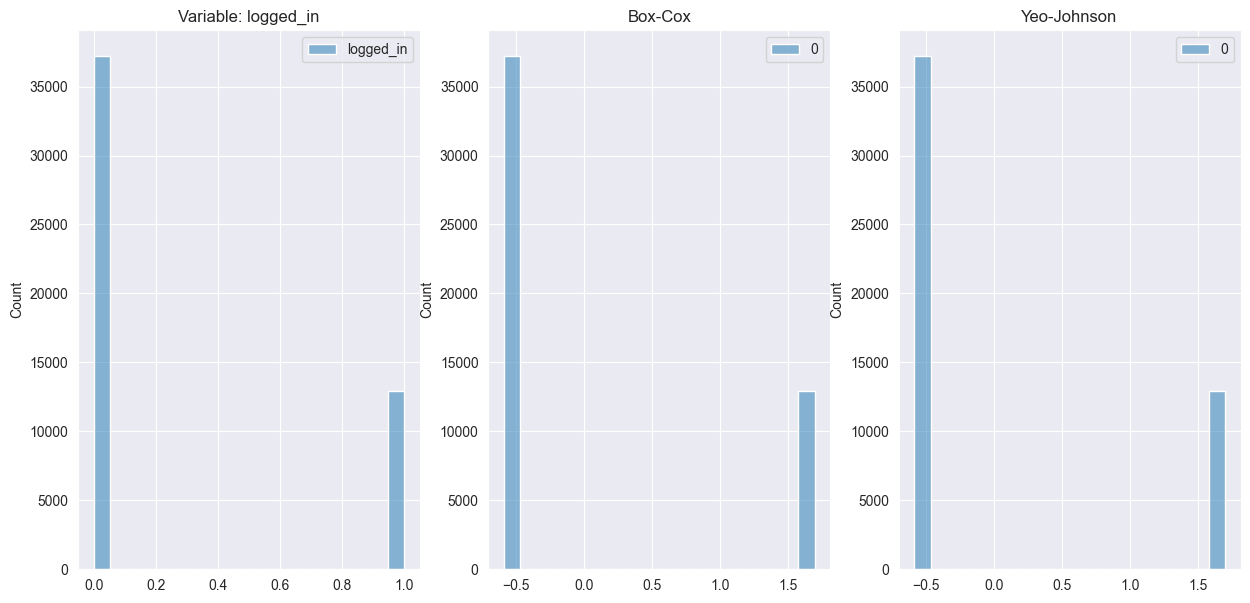

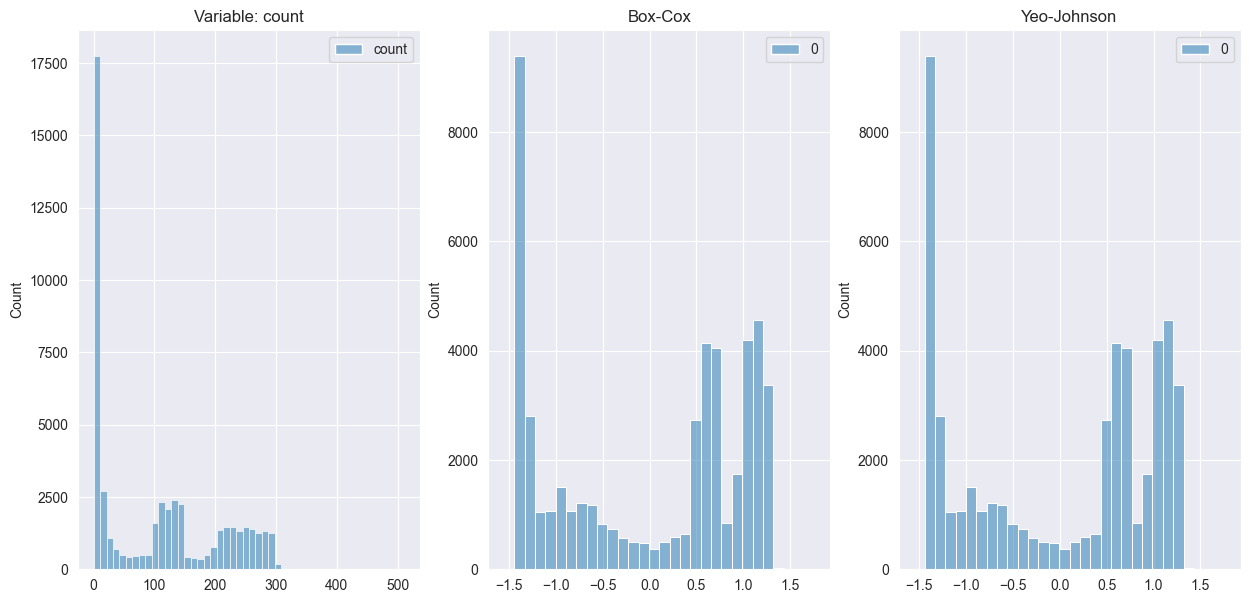

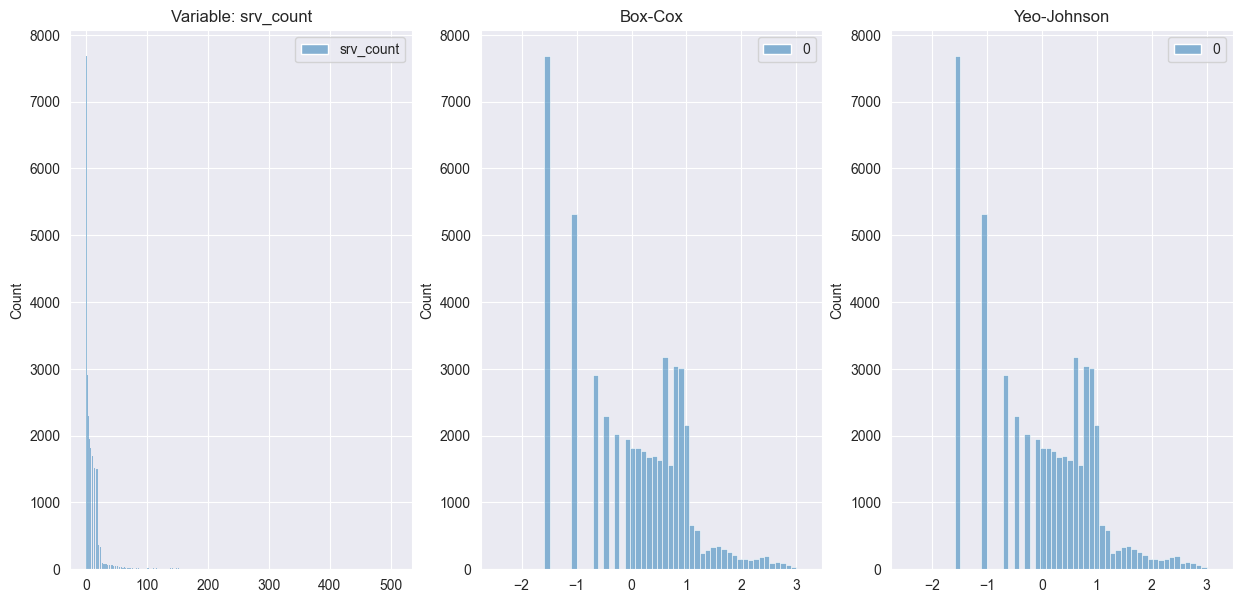

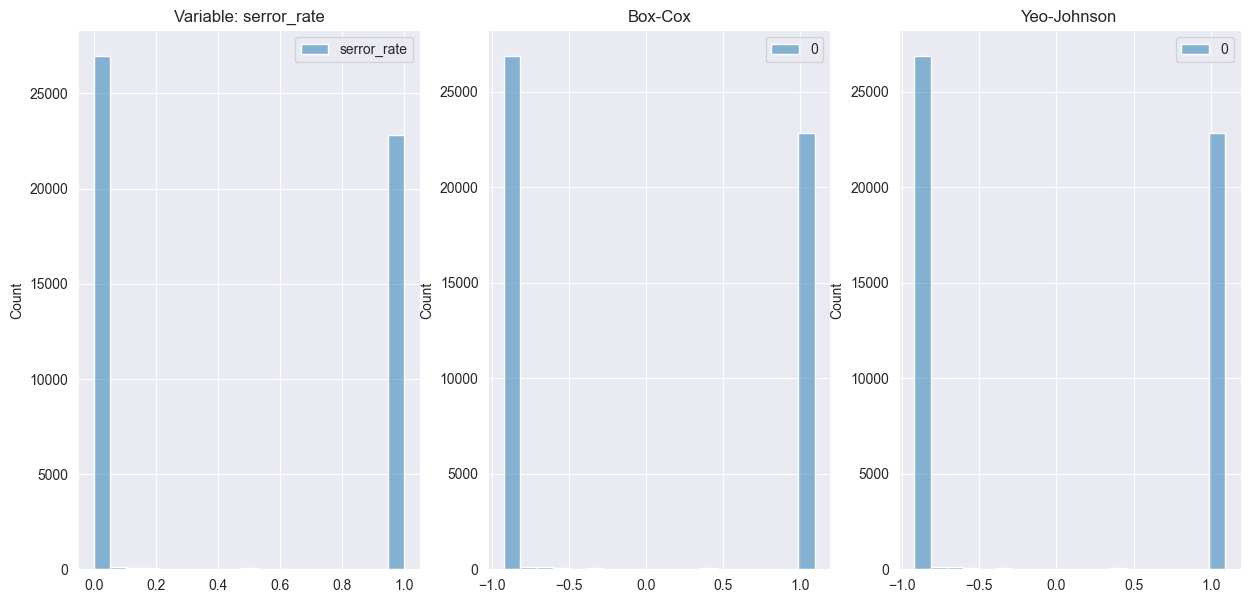

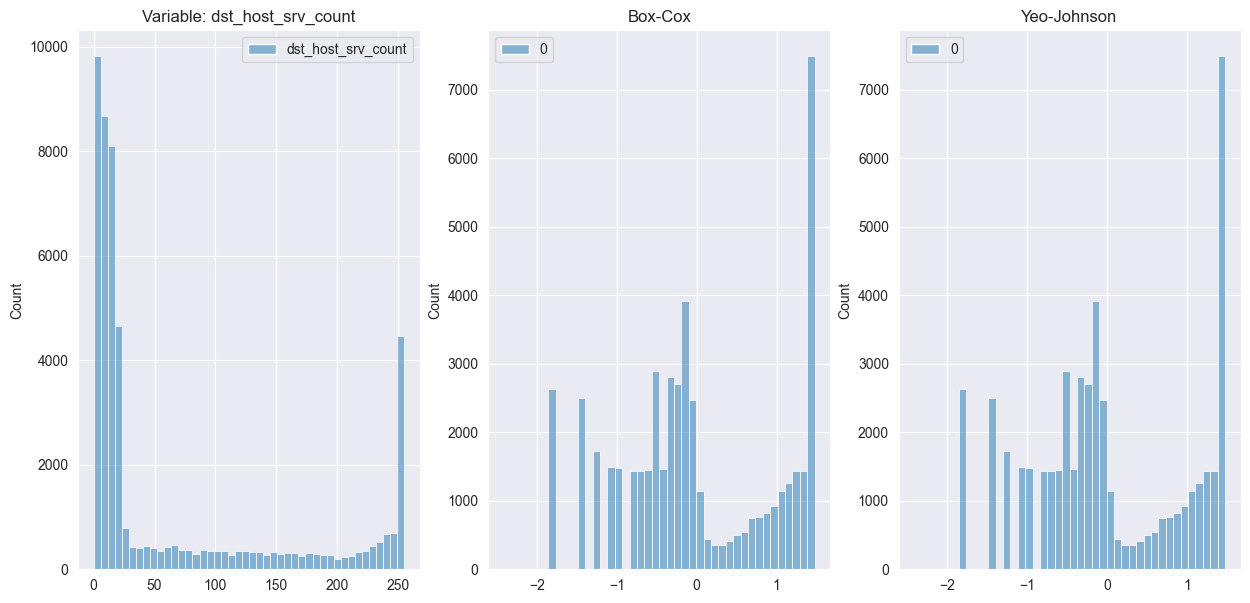

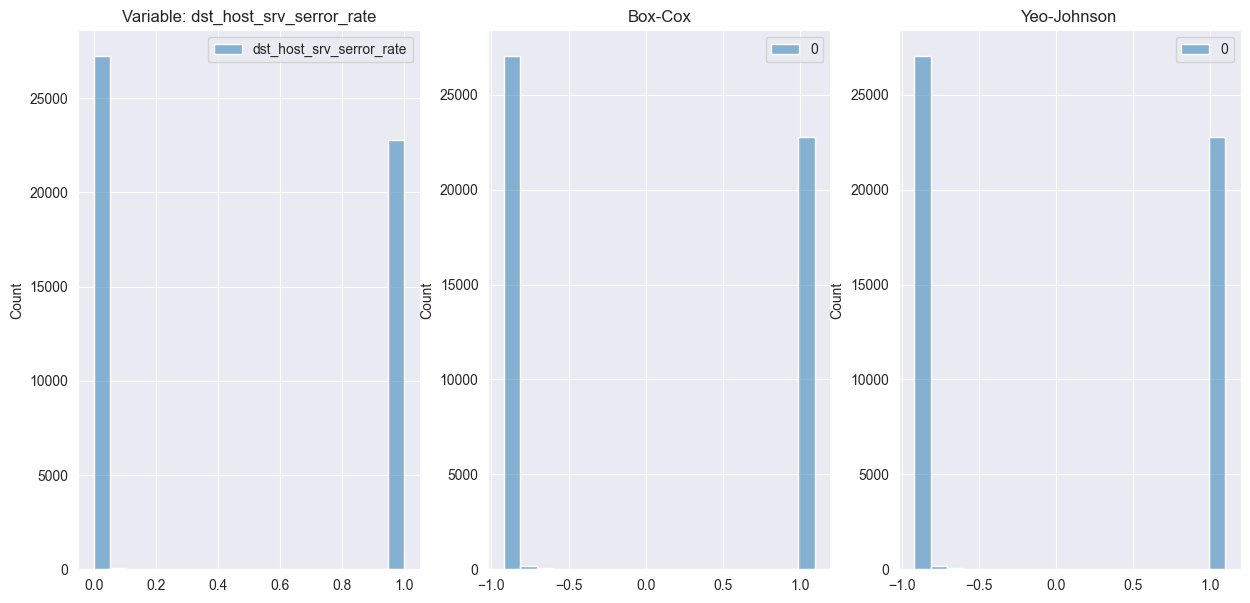

In [16]:
# codigo-alumno
var_numericas = ['duration','logged_in','count','srv_count','serror_rate','dst_host_srv_count','dst_host_srv_serror_rate']

# transformers
box_cox = PowerTransformer(method='box-cox')
yeo_johnson = PowerTransformer(method='yeo-johnson')

for feature in var_numericas:
    plt.figure(figsize=(15,7))
    X = df[[feature]]
    
    plt.subplot(1,3,1)
    plt.title(f'Variable: {feature}')
    sns.histplot(X)

    plt.subplot(1,3,2)
    plt.title('Box-Cox')
    Xtrans = box_cox.fit_transform(X+1)
    sns.histplot(Xtrans)
    
    plt.subplot(1,3,3)
    plt.title('Yeo-Johnson')
    Xtrans = yeo_johnson.fit_transform(X)
    sns.histplot(Xtrans)
    
    plt.show()

Por la forma de los histogramas, podría ser un buen estudio convertir las variables numéricas a variables dummy, y es lo que hareis en este apartado. En concreto, en la siguiente celda, realizad una binarización de estas features tomando el criterio que considereis más apropiado.

_Nota_: No siempre la media o la mediana es la mejor de los umbrales.

In [17]:
# codigo-alumno
media = ['serror_rate','dst_host_srv_serror_rate']
mediana = ['duration','logged_in','count','srv_count','dst_host_srv_count']

# binarizamos los datos y los guardamos en el dataframe
for mn in media:
    X = df[mn]
    umbral_mean = np.mean(X,axis=0)
    scaler = Binarizer(threshold=umbral_mean)
    X = scaler.fit_transform(X.values.reshape(-1,1))
    df[mn] = X

for mdn in mediana:
    X = df[mdn]
    umbral_median = np.median(X,axis=0)
    scaler = Binarizer(threshold=umbral_median)
    X = scaler.fit_transform(X.values.reshape(-1,1))
    df[mdn] = X


In [18]:
""" No alterar """

try:
    assert df.shape == (50177, 11)
    assert 0 < df['duration'].sum() < 50177
    assert 0 < df['count'].sum() < 50177
    assert 0 < df['srv_count'].sum() < 50177
    assert 0 < df['serror_rate'].sum() < 50177
    assert 0 < df['dst_host_srv_count'].sum() < 50177
    assert 0 < df['dst_host_srv_serror_rate'].sum() < 50177
    assert 0 < df['logged_in'].sum() < 50177
except:
    print('Algo falla')

In [19]:
df.head(5)

,duration,protocol_type,service,flag,logged_in,count,srv_count,serror_rate,dst_host_srv_count,dst_host_srv_serror_rate,labels
0,0.0,tcp,http,SF,1.0,0.0,0.0,0.0,0.0,0.0,normal.
1,0.0,tcp,http,SF,1.0,0.0,0.0,0.0,1.0,0.0,normal.
2,0.0,tcp,http,SF,1.0,0.0,0.0,0.0,1.0,0.0,normal.
3,0.0,tcp,http,SF,1.0,0.0,0.0,0.0,1.0,0.0,normal.
4,0.0,tcp,http,SF,1.0,0.0,0.0,0.0,1.0,0.0,normal.


Para finalizar con estas features, en la siguiente celda, se pide mostrar un baplot (no histograma) por cada una de estas variables binarias estratificado por la variable objetivo (labels)

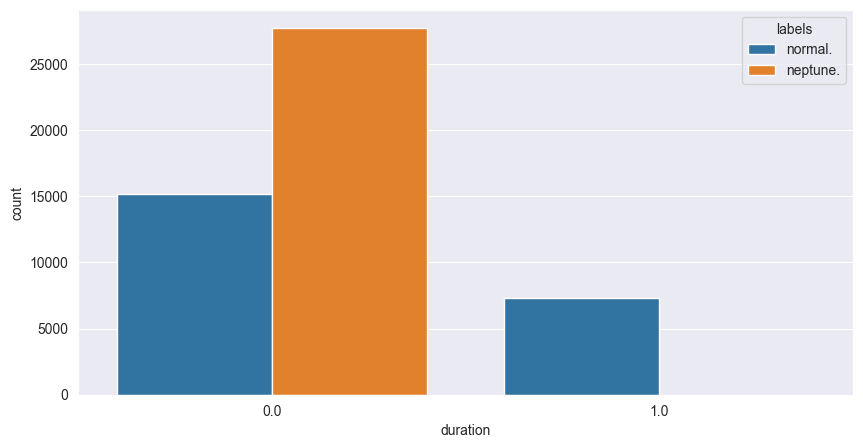

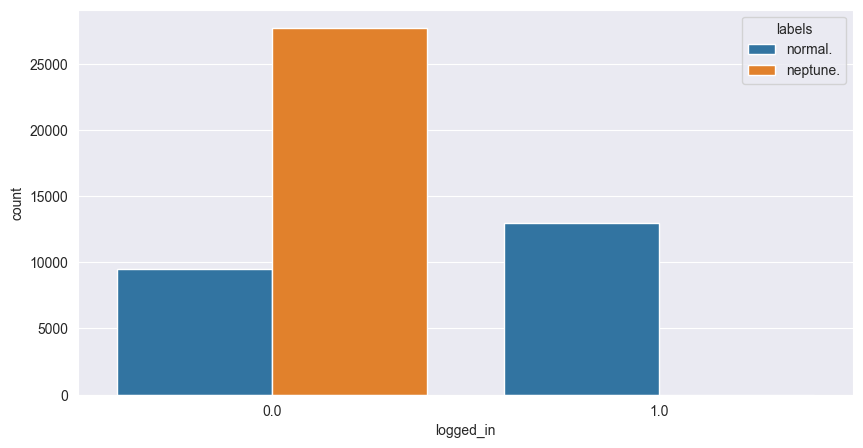

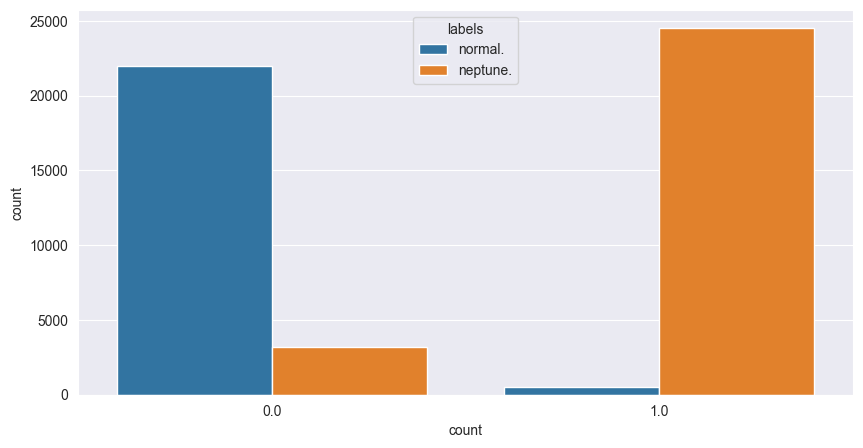

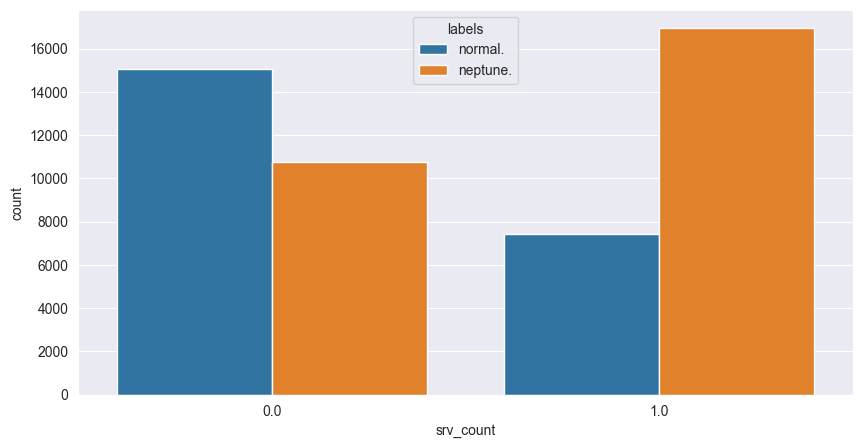

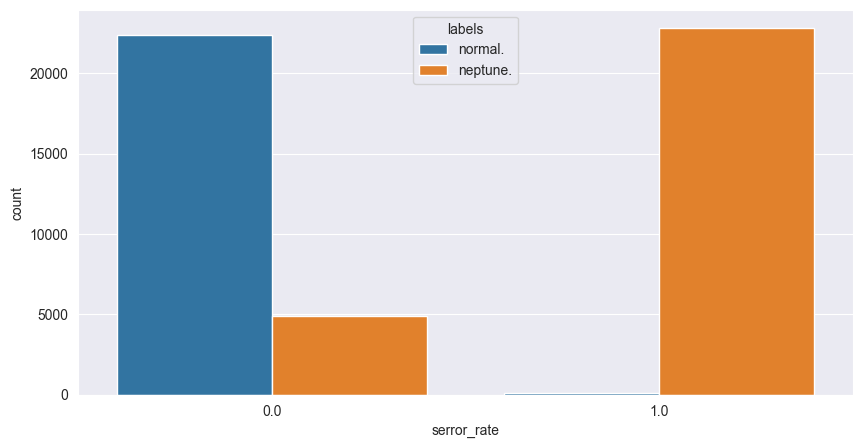

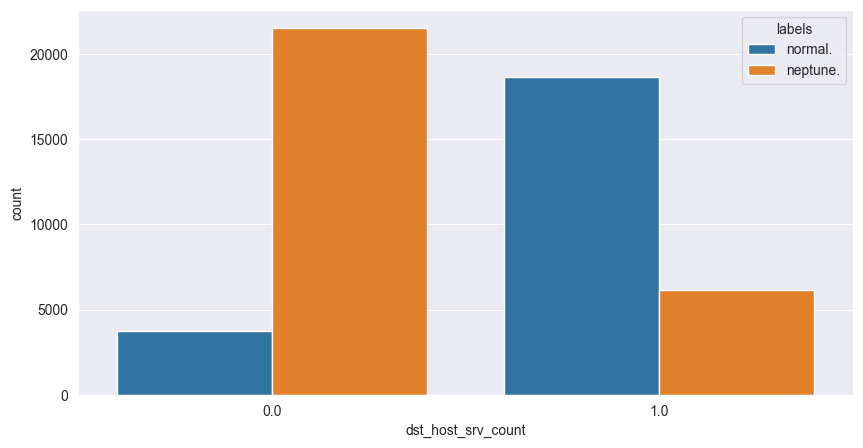

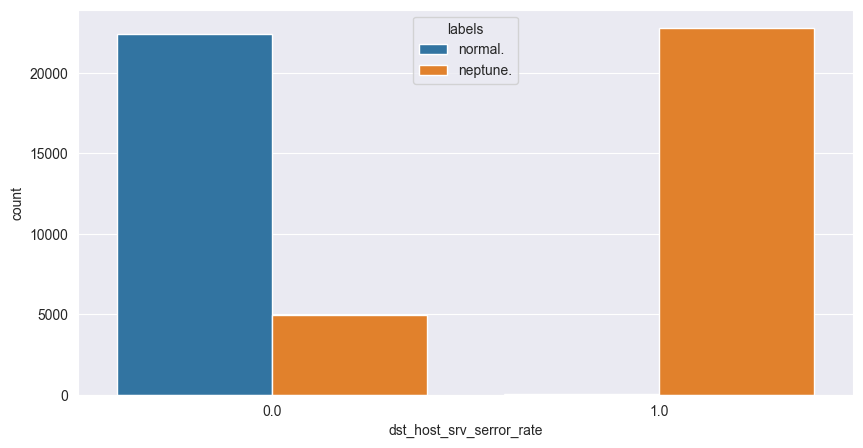

In [20]:
# codigo-alumno
for var in var_numericas:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df,x=var,hue='labels')
    plt.show()

En la siguiente celda, exploraremos las variables categóricas. Para ello, se pide mostrar un barplot por cada feature categórica:

In [21]:
df.dtypes

duration                    float64
protocol_type                object
service                      object
flag                         object
logged_in                   float64
count                       float64
srv_count                   float64
serror_rate                 float64
dst_host_srv_count          float64
dst_host_srv_serror_rate    float64
labels                       object
dtype: object

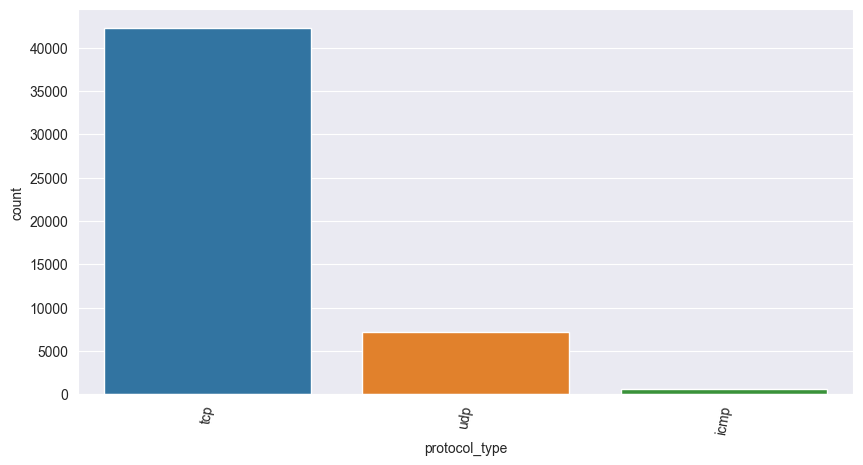

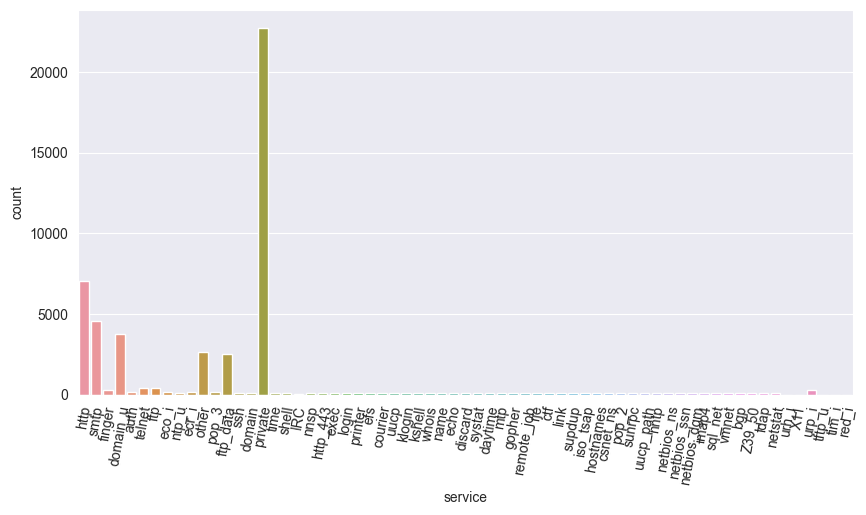

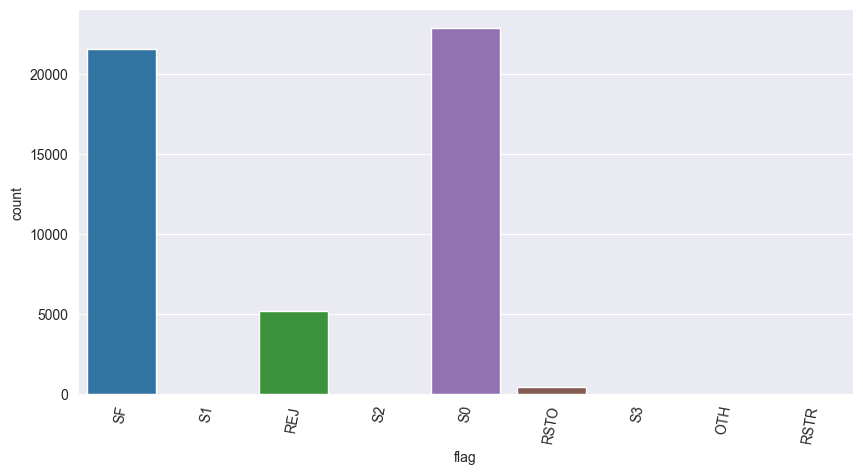

In [22]:
# codigo-alumno
var_cat = ['protocol_type','service','flag']
for cat in var_cat:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df,x=cat)
    plt.xticks(rotation=80)
    plt.show()

Para lo que resta de ejercicio, localizaremos las 2 categorías más frecuentes de las features _flag_ y _service_. En la siguiente celda, se pide transformar estas features para que ponga _resto_ a todos aquellos registros de estas features que no están entre las frecuentes, dejando así 3 catgorías en total.

In [23]:
print(df.groupby(df['flag']).size().sort_values(ascending=False))
print(df.groupby(df['service']).size().sort_values(ascending=False))

flag
S0      22846
SF      21553
REJ      5180
RSTO      493
S1         50
RSTR       31
S2         16
S3          7
OTH         1
dtype: int64
service
private     22715
http         7067
smtp         4574
domain_u     3799
other        2677
            ...  
urh_i          12
X11             9
tim_i           2
red_i           1
tftp_u          1
Length: 65, dtype: int64


In [24]:
# codigo-alumno
df['flag'] = df.flag.apply(lambda x: 'resto' if x not in ['S0','SF'] else x )
df['service'] = df.service.apply(lambda x: 'resto' if x not in ['private','http'] else x )

In [25]:
""" No alterar """

try:
    assert df.shape == (50177, 11)
    assert len(df[df['service'] == 'resto']) == 20395
    assert len(df[df['flag'] == 'resto']) == 5778
except:
    print('Algo falla')

Para finalizar con estas features, en la siguiente celda, se pide mostrar un baplot (no histograma) por cada una de estas features categóricas estratificado por la variable objetivo (labels)

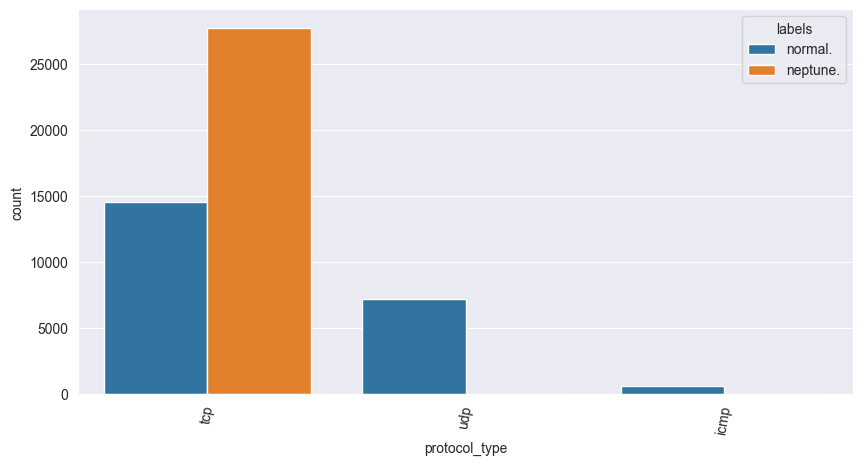

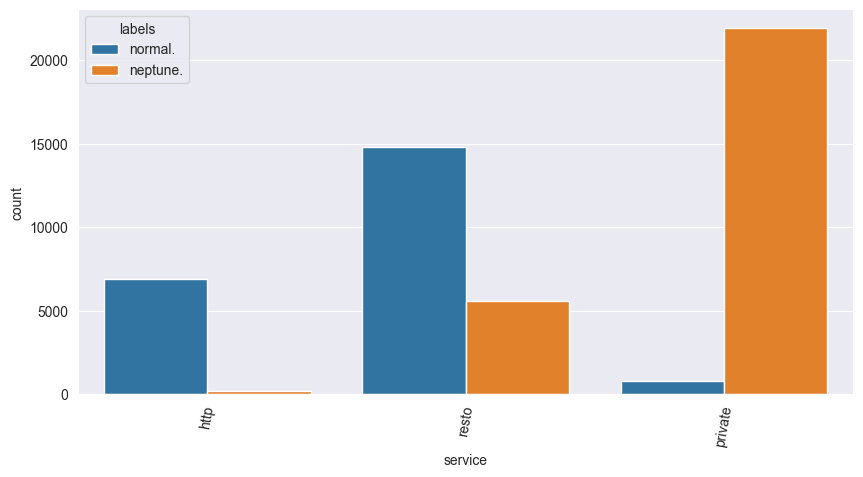

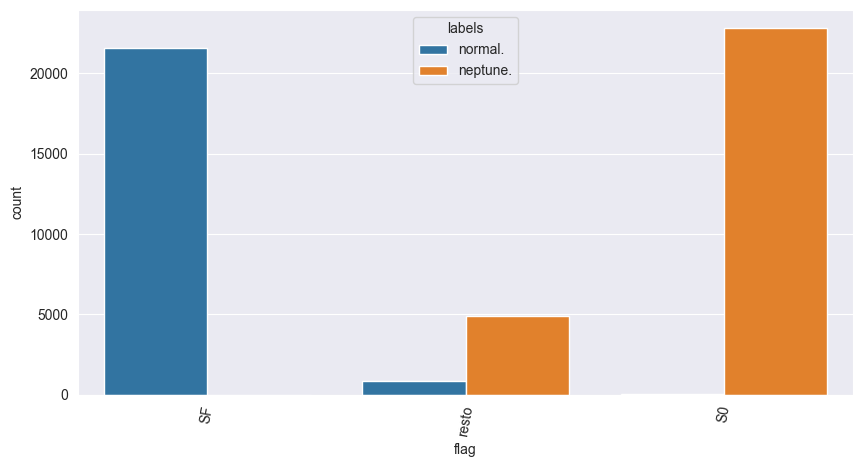

In [26]:
# codigo-alumno
for var in var_cat:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df,x=var,hue='labels')
    plt.xticks(rotation=80)
    plt.show()

Antes de empezar con la modelización, eliminad los duplicados en la siguiente celda:

In [27]:
# codigo-alumno
df = df.drop_duplicates()
df.duplicated().sum() # prev 50063

0

In [28]:
""" No alterar """

try:
    assert 100 < df.shape[0] < 1000
    assert df.shape[1] == 11
except:
    print('Algo falla')

# Fase de modelos

## Model 1

Realizad un ajuste de machine learning con las siguientes características:
* probad 5 algoritmos en bucle y mostrar un boxplot con los resultados
* usad la técnica de validación cruzada KFolds (5 folds) 
* entrenad solo con variables numericas 

In [29]:
""" Para plotear los resultados utilizaremos la siguiente función """

def boxplots_algorithms(results, names):
    
    plt.figure(figsize=(8,8))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.xticks(rotation=80)
    plt.show()

In [30]:
# muestra las variables numericas del dataframe
df[var_numericas].head()
var_numericas

['duration',
 'logged_in',
 'count',
 'srv_count',
 'serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_serror_rate']

LR: 0.900000 (0.061445)
LDA: 0.892857 (0.045175)
KNN: 0.850000 (0.072843)
DTC: 0.835714 (0.053452)
NB: 0.750000 (0.112938)
RFC: 0.857143 (0.050508)
SVC: 0.907143 (0.048445)


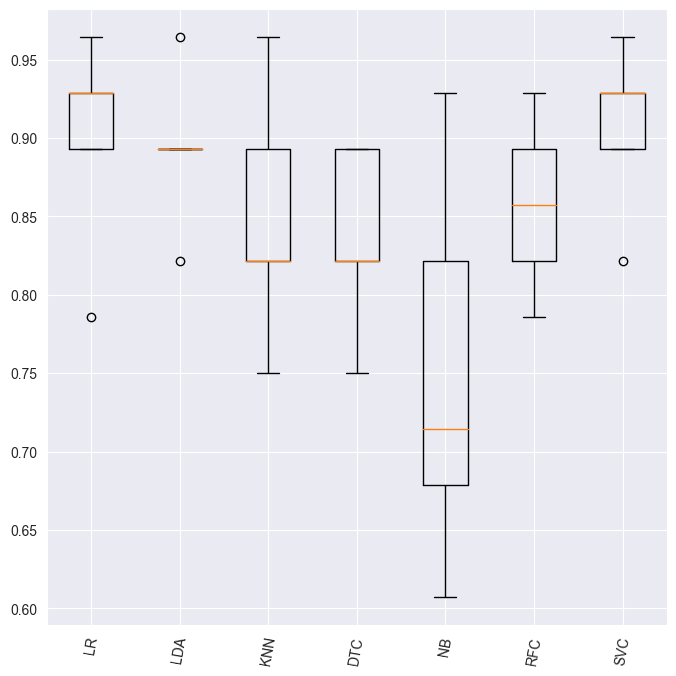

In [31]:
# codigo-alumno
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier(random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier(random_state=seed)))
models.append(('SVC', SVC()))

results = []
names = []

X = df[var_numericas] # ['duration', 'logged_in', 'count', 'srv_count', 'serror_rate', 'dst_host_srv_count', 'dst_host_srv_serror_rate']]
y = df['labels']

for name, model in models:
    # evaluamos el modelo con validacion cruzada
    cv_technique = KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model,X,y,cv=cv_technique)
    
    # mostramos los resultados, media y desviacion estandar
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    results.append(cv_results)
    names.append(name)
    
boxplots_algorithms(results, names)

## Model 2

Realizad un ajuste de machine learning con las siguientes características:
* probad 5 algoritmos en bucle
* usad la técnica de validación KFolds (5 folds) 
* usad un pipeline que encadene 
    * One-hot-encoder con las variables tipo string
    * algortimo 
* entrenad con todas las variables
* mostrad la matriz de confusión en cada caso

LR: 0.885714 (0.041650)
[[34  7]
 [ 9 90]]
LDA: 0.885714 (0.041650)
[[34  7]
 [ 9 90]]
KNN: 0.878571 (0.036422)
[[33  7]
 [10 90]]
DTC: 0.885714 (0.041650)
[[34  7]
 [ 9 90]]
NB: 0.714286 (0.039123)
[[43 40]
 [ 0 57]]
RFC: 0.885714 (0.041650)
[[34  7]
 [ 9 90]]
SVC: 0.885714 (0.041650)
[[34  7]
 [ 9 90]]


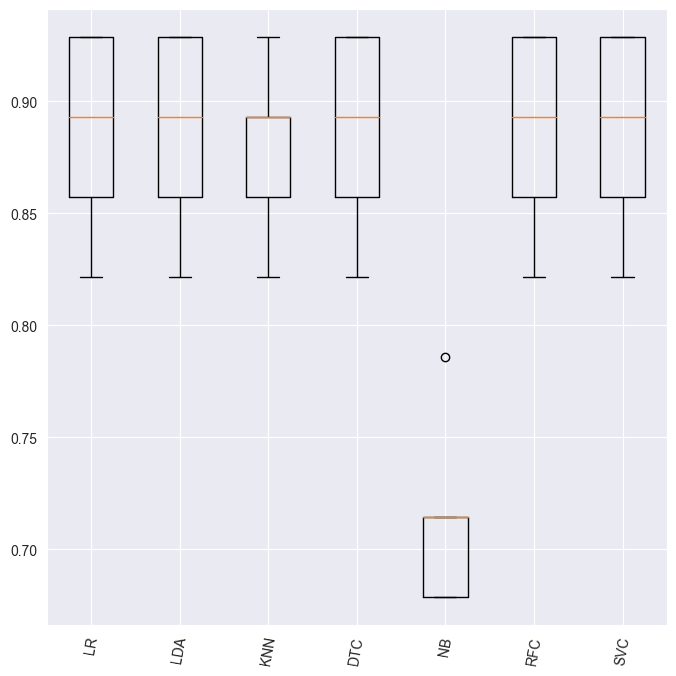

In [32]:
# codigo-alumno
col_transformer = ColumnTransformer([
    ('HotEncoder', OneHotEncoder(), var_cat) # ['protocol_type', 'service', 'flag']
])

results = []
names = []

# Usaremos todas las variables menos labels
X = df.drop('labels', axis=1)
y = df['labels']
for name, model in models:

    pipeline = make_pipeline(col_transformer, model)

    cv_technique = KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results = cross_val_score(pipeline, X, y, cv=cv_technique)
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    pred = cross_val_predict(pipeline, X, y, cv=cv_technique)
    print(confusion_matrix(pred, y))
    
boxplots_algorithms(results, names)

Realizad un ajuste de machine learning en bucle con las siguientes características:
* probad 3 PCA dentro del pipeline y en bucle para n_components=3,4,5 
* probad 5 algoritmos en bucle
* usad la técnica de validación StratifiedKFolds (5 folds) 
* usad un pipeline que encadene 
     * One-hot-encoder con las variables tipo string, especificando eliminar la primera columna si es binaria
     * PCA
     * algortimo 
* mostrad la matriz de confusión en cada caso

## Model 3

LR: 0.85 (0.07953949089757174) - PCA 3
[[29  7]
 [14 90]]
LDA: 0.85 (0.07953949089757174) - PCA 3
[[29  7]
 [14 90]]
KNN: 0.7857142857142857 (0.10101525445522111) - PCA 3
[[33 20]
 [10 77]]
DTC: 0.8857142857142858 (0.07284313590846836) - PCA 3
[[34  7]
 [ 9 90]]
NB: 0.8357142857142857 (0.0735402152927643) - PCA 3
[[27  7]
 [16 90]]
RFC: 0.8642857142857142 (0.06144518047887593) - PCA 3
[[31  7]
 [12 90]]
SVC: 0.8857142857142858 (0.07284313590846836) - PCA 3
[[34  7]
 [ 9 90]]
LR: 0.8857142857142858 (0.07284313590846836) - PCA 4
[[34  7]
 [ 9 90]]
LDA: 0.8857142857142858 (0.07284313590846836) - PCA 4
[[34  7]
 [ 9 90]]
KNN: 0.7857142857142857 (0.10101525445522111) - PCA 4
[[33 20]
 [10 77]]
DTC: 0.8857142857142858 (0.07284313590846836) - PCA 4
[[34  7]
 [ 9 90]]
NB: 0.8642857142857142 (0.1138384103607802) - PCA 4
[[34 10]
 [ 9 87]]
RFC: 0.8642857142857142 (0.06144518047887593) - PCA 4
[[31  7]
 [12 90]]
SVC: 0.8642857142857142 (0.06144518047887593) - PCA 4
[[31  7]
 [12 90]]
LR: 0.885714

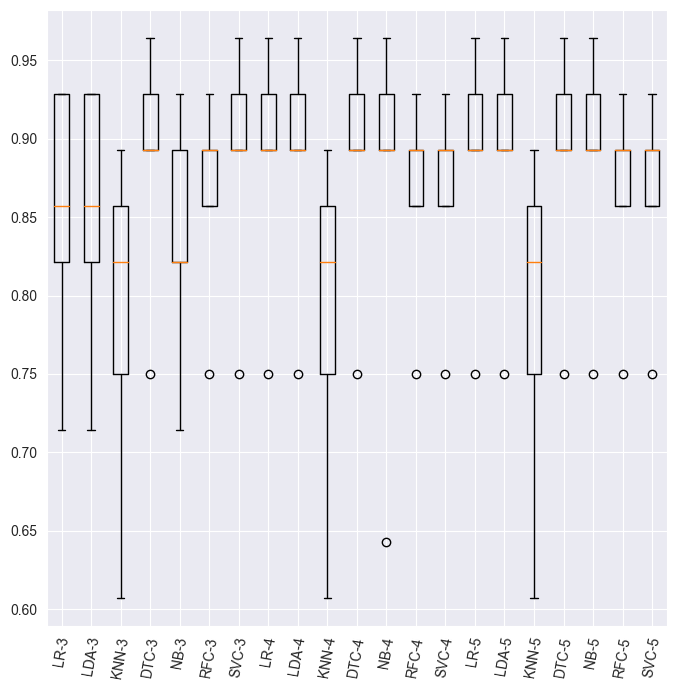

In [33]:
# codigo-alumno

results = []
names = []

# Usaremos todas las variables menos labels
X = df.drop('labels', axis=1)
y = df['labels']

col_transformer = ColumnTransformer([
    ('HotEncoder', OneHotEncoder(drop='if_binary' ), var_cat) # ['protocol_type', 'service', 'flag']
    # ,('PCA', PCA(n_components=component))
])
for component in range(3,6):
    
    for name, model in models:

        pipeline = make_pipeline(col_transformer,PCA(n_components=component), model)

        cv_technique = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
        cv_results = cross_val_score(pipeline, X, y, cv=cv_technique)

        results.append(cv_results)
        names.append(f"{name}-{component}")
        # msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(f"{name}: {cv_results.mean()} ({cv_results.std()}) - PCA {component}")
        
        pred = cross_val_predict(pipeline, X, y, cv=cv_technique)
        print(confusion_matrix(pred, y))
    
boxplots_algorithms(results, names)

## Model 4

Con el estudio previo que hemos realizado de validación cruzada, ya sabremos qué algoritmos son más robustos. En esta parte, vamos a separar primero el dataset en _train_ y _test_. En concreto, separaremos el 20% del dataset en el _test-set_ con el que validaremos la calidad real del algortimo. Tras ello, solo con el _train test_, se pide realizar un ajuste de machine learning con las siguientes características:
* usad el mejor algoritmo a vuestro juicio (pero se pide justificarlo en un comentario del código)
* usad un pipeline que encadene 
    * One-hot-encoder con las variables tipo string, especificando eliminar la primera columna si es binaria
    * algortimo 
* Realizad la predicción de _train_ y _test_ para poder mostrar ambas matrices de confusión (justificar si existe overfitting).

In [34]:
# Acorde al comportamiento visto en los modelos anteriores y 
# teniendo en cuenta las transformaciones propuestas, 
# parece que el algoritmo más robusto es DTC, luego RFC y por último SVC.

In [35]:
# codigo-alumno
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=seed)

pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary')),
    ('DTC', DecisionTreeClassifier(random_state=seed))
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

score = pipeline.score(X_test, y_test)
print(f'Puntuación DTC: {score}')

confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

print('Matriz entrenamiento: \n', confusion_matrix_train)
print('Matriz test: \n',confusion_matrix_test)

Puntuación DTC: 0.9285714285714286
Matriz entrenamiento: 
 [[36  0]
 [ 3 73]]
Matriz test: 
 [[ 6  1]
 [ 1 20]]


In [36]:
# Parece que el modelo tiene un buen rendimiento, y el overfitting no es muy alto ya que la diferencia entre las matrices de confusión es baja.

## Model 5

Con el estudio previo que hemos realizado de validación cruzada, ya sabremos qué algoritmos son más robustos. En esta parte, vamos a separar primero el dataset en train y test. En concreto, separaremos el 20% del dataset en el test-set con el que validaremos la calidad real del algortimo. Tras ello, solo con el train test, se pide realizar un ajuste de machine learning con las siguientes características:
* usad el mismo algoritmo que en el apartado anterior
* usad la técnica de validación cruzada KFolds (5 folds) 
* usad un pipeline que encadene:
     * One-hot-encoder si son tipo variables tipo string, especificando eliminar la primera columna si es binaria
     * StandardScaler
     * algortimo 
* realizar un tuneado del modelo con grid-search
    
Con el mejor de los modelos tuneados, realizad la predicción de _train_ y _test_ para poder mostrar ambas matrices de confusión (justificar si existe overfitting).

In [37]:
# codigo-alumno